In [21]:
import pandas as pd
import numpy as np

In [22]:
life = pd.read_csv("Life-Expectancy-Data-Updated.csv")

In [23]:
life.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [24]:
features=["Infant_deaths", "Under_five_deaths", "Adult_mortality" ,"Alcohol_consumption" , "Population_mln", "Life_expectancy"]

In [25]:
life = life.dropna(subset=features)

In [26]:
data = life[features].copy()

In [27]:
data

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
0,11.1,13.0,105.8240,1.320,78.53,76.5
1,2.7,3.3,57.9025,10.350,46.44,82.8
2,51.5,67.9,201.0765,1.570,1183.21,65.4
3,32.8,40.5,222.1965,5.680,0.75,67.0
4,3.4,4.3,57.9510,2.890,7.91,81.7
...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,11.33,49.9
2860,23.9,28.6,235.2330,6.560,2.67,66.9
2861,17.7,28.9,134.8950,1.560,19.39,74.3
2862,7.9,9.9,204.0120,11.000,3.44,71.8


In [28]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [29]:
data.describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,3.095656,2.825619,3.132430,3.697751,1.265230,7.634251
std,2.020405,2.002245,1.715139,2.228287,0.989186,2.118380
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.462216,1.331312,1.858631,1.671517,1.014622,6.247748
50%,2.305943,1.934412,2.708381,3.249580,1.056313,8.207207
75%,4.341893,3.861635,3.946482,5.352266,1.171096,9.108108
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [30]:
data.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Population_mln,Life_expectancy
0,1.682318,1.480683,1.842418,1.738668,1.568569,9.355856
1,1.066031,1.044924,1.127146,6.791830,1.335996,10.774775
2,4.646368,3.946990,3.264147,1.878567,9.574773,6.855856
3,3.274395,2.716083,3.579382,4.178511,1.004856,7.216216
4,1.117388,1.089847,1.127870,2.617236,1.056748,10.527027


In [31]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [32]:
centroids = random_centroids(data, 5)

C:\Users\HP\AppData\Local\Temp\ipykernel_17284\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [33]:
centroids

,0,1,2,3,4
Infant_deaths,1.520910,1.088041,1.132062,1.491563,1.095378
Under_five_deaths,1.790656,1.557053,1.170710,1.386343,1.094340
Adult_mortality,1.987751,1.730929,1.924488,3.387964,1.468106
Alcohol_consumption,4.116956,6.069950,4.799664,1.598769,6.013990
Population_mln,1.034281,1.040079,1.002174,1.009784,1.079578
Life_expectancy,5.729730,8.342342,9.468468,7.396396,3.860360


In [34]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [35]:
labels = get_labels(data, centroids)

In [36]:
labels.value_counts()

3    1251
2     675
1     524
0     414
Name: count, dtype: int64

In [37]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [39]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

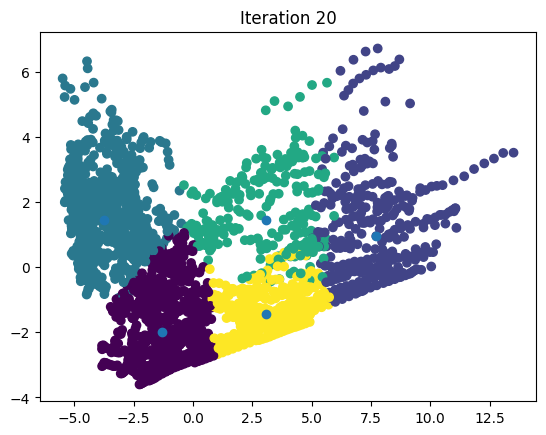

In [40]:
max_iterations = 100
k = 6

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

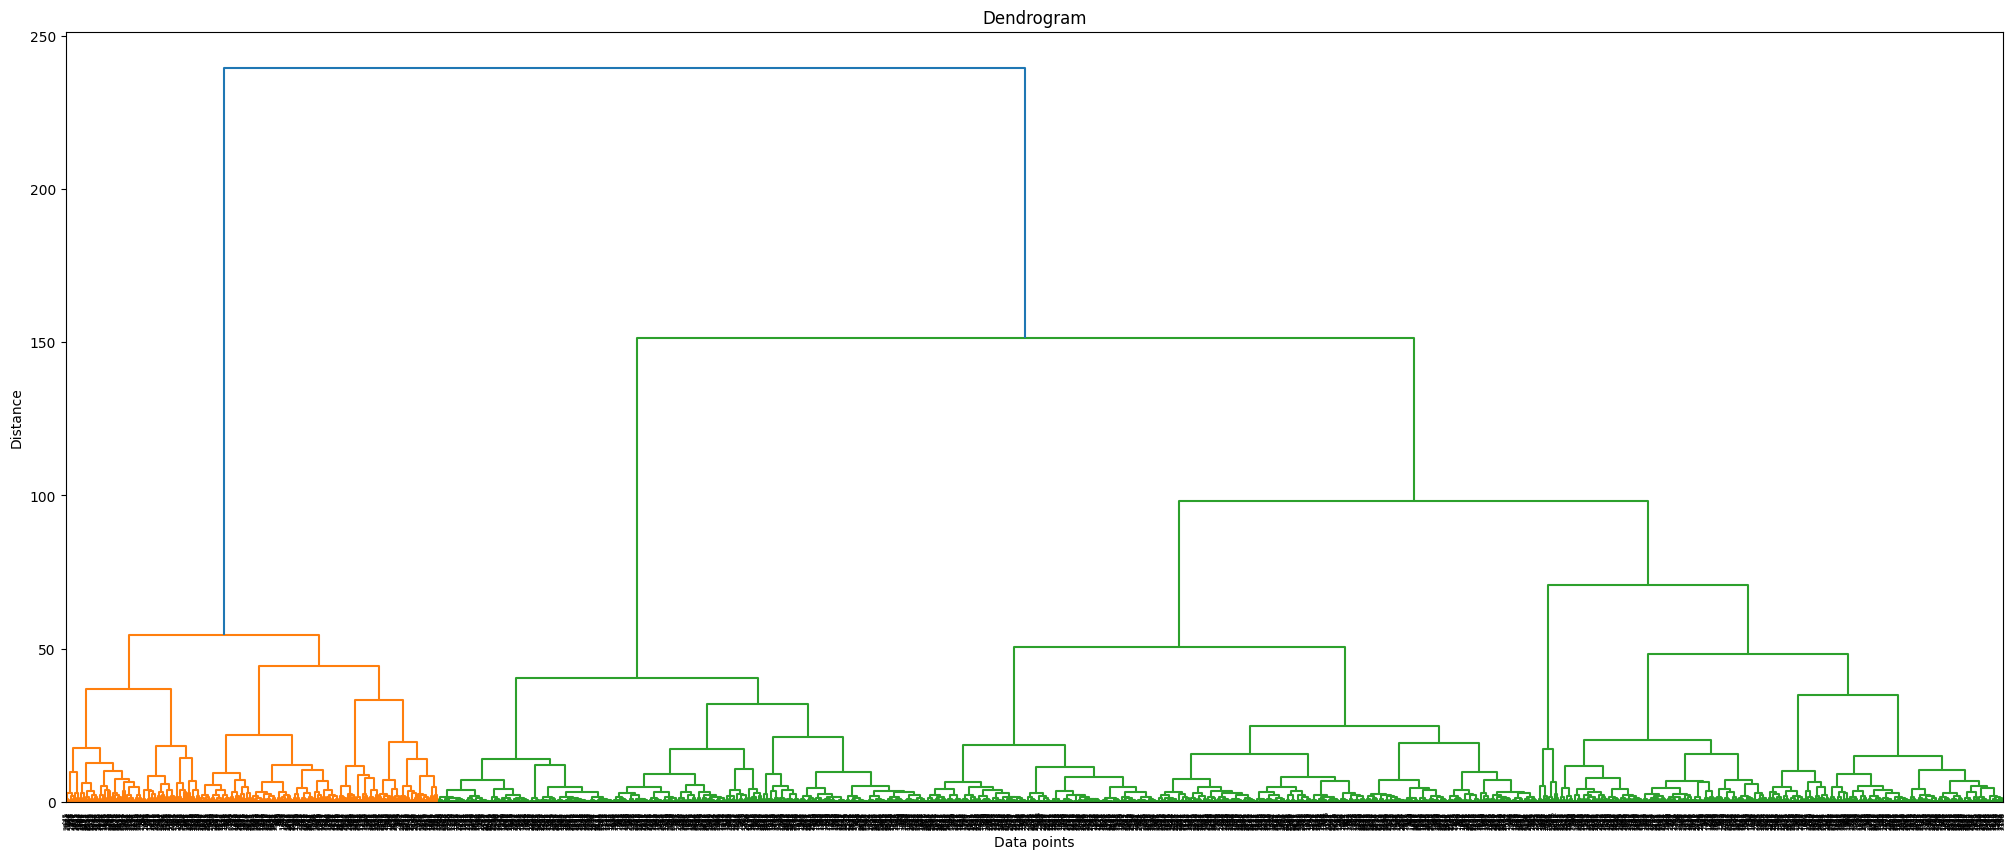

In [47]:
Z = linkage(data, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
